In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from evaluate_prf1 import prf1_sweep, dir_is_inter_robot_lc, method_to_color

In [35]:
names = {
    "svg_r15": "semantic/vol/grav, vol eps=0.2",
    "evg_r15,": "extent/vol/grav",
    "pvg_r15": "pca/vol/grav",
    "prunevolgrav": "prune vol/grav",
    "svg_vol_eps_0.0": "semantics/vol/grav",
    "spvg": "semantics/pca/vol/grav",
    "spvg_min_cos_0.85": "ROMAN",
    "svg": "semantic/vol/grav",
    "pvg": "ROMAN w/o semantics",
    "prune": "CLIPPER",
    "prunevolgrav_fr": "CLIPPER + Prune",
    "ransac_100K": "RANSAC-100K",
    "ransac_1M": "RANSAC-1M",
    "point3d": "CLIPPER"
}

# results_dir = "/home/lucas/Workspace/sparse_mapping/segment_track/align/02_vio_10Hz"
# results_dir = "/home/masonbp/results/submap_align/kmd_outdoor/05_clip_6Hz"
# results_dir = "/home/swarm/results/submap_align/kmd_outdoor/08_6Hz"
results_dir = "/home/swarm/results/submap_align/kmd_outdoor/09_6Hz_voxel0.2"
# results_dir = "/home/lucas/Downloads/00_vio_6Hz/00_vio"
# robots = ['sparkal1', 'sparkal2', 'acl_jackal', 'acl_jackal2', 'thoth', 'hathor']
# line_styles = [':', '--', '-.']
line_styles = ['-']
# methods = ["00_semanticvolgrav", "01_sig_0.2_eps_0.4"]
# methods = ["00_semanticvolgrav"]
# methods = ["svg_r15", 'svg_r20', 'evg_r15,', "pvg_cos_r15", "pvg_r15", "svg_r15_veps_0.2", "prunevolgrav"]
# methods = ["svg_r15", 'evg_r15,', "pvg_r15",  "prunevolgrav", "svg_vol_eps_0.0", "spvg"]
# methods = ["svg", "spvg", "spvg_min_cos_0.85", "pvg", "prune", "spvg_min_cos_0.85_sig0.3", "spvg_min_cos_0.85_c15", "spvg_min_cos_0.85_voxelvol"] #, "spvg", "pvg", "prune"]
# methods = ["spvg_min_cos_0.85", "pvg", "prunevolgrav_fr", "ransac_100K", "ransac_1M", "point3d", "semanticgrav", "gravity", "product", "arithmetic_mean"]
# methods = ["spvg_min_cos_0.85", "spvg_eps_0.1"]

# comparison methods
comparison_methods = ["spvg_min_cos_0.85", "ransac_100K", "ransac_1M", "point3d", "prunevolgrav_fr"]

# parts add ins
ablation_methods = ["point3d", "gravity", "semanticgrav", "spvg_min_cos_0.85"]
names = {"point3d": "Point Only", "gravity": "+ Gravity", "semanticgrav": "+ Semantics", "spvg_min_cos_0.85": "+ PCA/Volume"}

# parts add ins
ablation_methods = ["point3d", "product", "arithmetic_mean", "spvg_min_cos_0.85"]
names = {"point3d": "Point Only", "spvg_min_cos_0.85": "Geometric Mean"}

methods = ablation_methods

# DSTA plot
# methods = ["spvg_min_cos_0.85", "ransac_100K", "ransac_1M", "point3d"]
# names = {
#     "spvg_min_cos_0.85": "ROMAN", #"gravity + shape + semantics",
#     "ransac_100K": "RANSAC w/ 100K iterations",
#     "ransac_1M": "RANSAC w/ 1M iterations",
#     "point3d": "PUMA"
# }
sub_dirs = [x[0] for x in os.walk(results_dir)][1:]


In [36]:
# %matplotlib widget

In [37]:
plt.close()

In [38]:
# [x[0] for x in os.walk(results_dir)][1:]

/home/swarm/results/submap_align/kmd_outdoor/09_6Hz_voxel0.2/acl_jackal_acl_jackal
/home/swarm/results/submap_align/kmd_outdoor/09_6Hz_voxel0.2/hathor_hathor
/home/swarm/results/submap_align/kmd_outdoor/09_6Hz_voxel0.2/thoth_thoth
/home/swarm/results/submap_align/kmd_outdoor/09_6Hz_voxel0.2/sparkal2_sparkal2
/home/swarm/results/submap_align/kmd_outdoor/09_6Hz_voxel0.2/sparkal1_sparkal1
/home/swarm/results/submap_align/kmd_outdoor/09_6Hz_voxel0.2/acl_jackal2_acl_jackal2


[None, None, None, None, None, None]

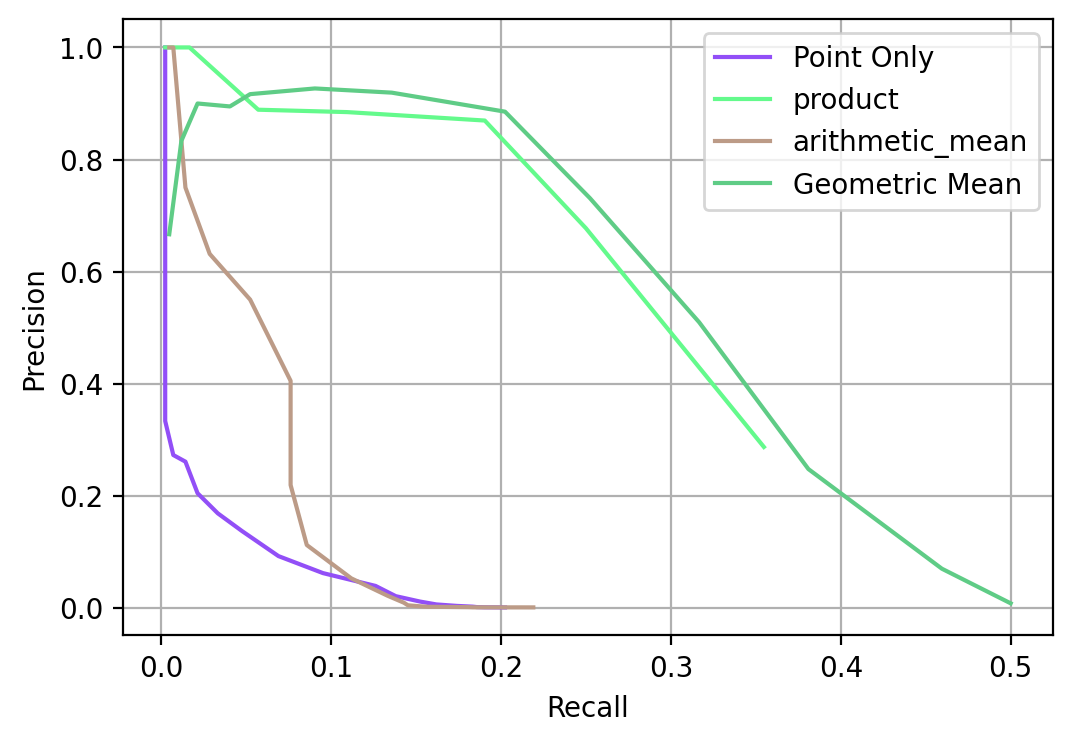

In [39]:
plt.close()
fig, ax = plt.subplots(dpi=200, figsize=(6, 4))


req_err_ang = 5.
req_err_dist = 2.5
# req_err_ang = 3.
# req_err_dist = 1.5
req_overlap = 2/3
for i, method in enumerate(methods):
    try:
        # all_files = [f"{sub_dir}/{method}.pkl" for sub_dir in sub_dirs  if 'sparkal1' in sub_dir and 'sparkal2' in sub_dir]
        # all_files = [f"{sub_dir}/{method}.pkl" for sub_dir in sub_dirs  \
        #     if ('sparkal1' in sub_dir or 'sparkal2' in sub_dir or 'acl_jackal' in sub_dir or 'acl_jackal2' in sub_dir) \
        #     and not dir_is_inter_robot_lc(sub_dir)]
        all_files = [f"{sub_dir}/{method}.pkl" for sub_dir in sub_dirs if not dir_is_inter_robot_lc(sub_dir)]

        # precisions, recalls, f1s, assoc_reqs = prf1_sweep([f"{results_dir}/{method}_mat"], req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
        # print([f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs])
        # precisions, recalls, f1s, assoc_reqs = prf1_sweep([f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs], req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
        precisions, recalls, f1s, assoc_reqs = \
            prf1_sweep(all_files, 
                       req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
    except OSError as e:
        print(e)
        continue
    ax.plot(recalls, precisions, label=names[method] if method in names else method, linestyle=line_styles[i % len(line_styles)], color=method_to_color(method))
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend()
# plt.show()
ax.grid(True)
# plt.show()
# plt.savefig("/home/masonbp/figs/outdoor_global_loc_rss24/kmd_pr.pdf")



not_included = [sub_dir for sub_dir in sub_dirs if dir_is_inter_robot_lc(sub_dir)]
[print(i) for i in not_included]
    